In [1]:
import pandas as pd
import os

In [2]:
def f1_score_comp(truth, df):
    TP = 0
    FP = 0
    FN = 0

    truth_ids = truth['ID'].unique()

    for row in df.iterrows():
        pred_id = row[1].ID
        pred_sdg = row[1].SDG
        
        if pred_id in truth_ids:
            eval_row = truth[truth.ID == pred_id]
            actual_sdgs = eval_row['SDG'].unique()

            if pred_sdg in actual_sdgs:
                TP += 1
            else:
                FP += 1

            for actual_sdg in actual_sdgs:
                if actual_sdg not in [pred_sdg]:
                    FN += 1
        else:
            if pred_sdg == 0:
                TP += 1
            else:
                FP += 1

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return f1_score


class SDGEvaluation:
    def __init__(self, truth, df):
        self.truth = truth
        self.df = df
        self.truth_ids = self.truth['ID'].unique()

    def compute_f1_for_sdg(self, sdg):
        TP = 0
        FP = 0
        FN = 0
        
        pred_df = self.df[self.df['SDG'] == sdg]
        truth_df = self.truth[self.truth['SDG'] == sdg]

        for index, row in pred_df.iterrows():
            pred_id = row['ID']
            if pred_id in self.truth_ids:
                if pred_id in truth_df['ID'].values:
                    TP += 1
                else:
                    FP += 1
            else:
                FP += 1
        
        for index, row in truth_df.iterrows():
            if row['ID'] not in pred_df['ID'].values:
                FN += 1

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return f1_score

    def evaluate_all_sdgs(self):
        results = {}
        for sdg in range(0, 18):
            f1_score = self.compute_f1_for_sdg(sdg)
            results[sdg] = f1_score
        return results

# Load Truth data
truth = pd.read_json("task2_test-covered.jsonl", lines=True)
truth_set = truth[["ID", "SDG"]]

train_set = pd.read_json("task1_test-covered.jsonl", lines=True)
train_set = train_set[["ID"]]

merged_set = pd.merge(train_set, truth_set, on='ID', how='left', indicator=True)
new_entries = merged_set[merged_set['_merge'] == 'left_only'][['ID']]
new_entries['SDG'] = 0

updated_truth_set = pd.concat([truth_set, new_entries], ignore_index=True)

# Ensemble Eval
ensemble = pd.read_json("TEAM_MANUEL_ANDREAS_KEVIN_UZH_RUN1_ENSEMBLE_TASK1.jsonl", lines=True)
ensemble_evaluator = SDGEvaluation(updated_truth_set, ensemble)
all_f1_scores = ensemble_evaluator.evaluate_all_sdgs()
print("Ensemble Eval:")
print("----------------------------")
for sdg, score in all_f1_scores.items():
    print(f"SDG {sdg}: F1 Score = {score:.4f}")
print("----------------------------")
print("Overall:")
print("F1 Score:", round(f1_score_comp(truth_set, ensemble),4))
print("----------------------------")

# GPT4 Eval
gpt = pd.read_json(r"TEAM_MANUEL_ANDREAS_KEVIN_UZH_RUN2_GPT4_TASK1.jsonl", lines=True)
gpt_evaluator = SDGEvaluation(updated_truth_set, gpt)
all_f1_scores = gpt_evaluator.evaluate_all_sdgs()
print("GPT Eval:")
print("----------------------------")
for sdg, score in all_f1_scores.items():
    print(f"SDG {sdg}: F1 Score = {score:.4f}")
print("----------------------------")
print("Overall:")
print("F1 Score:", round(f1_score_comp(truth_set, gpt),4))
print("----------------------------")

# Mixtral Eval
mixtral = pd.read_json(r"TEAM_MANUEL_ANDREAS_KEVIN_UZH_RUN3_MIXTRAL_TASK1.jsonl", lines=True)
mixtral_evaluator = SDGEvaluation(updated_truth_set, mixtral)
all_f1_scores = mixtral_evaluator.evaluate_all_sdgs()
print("Mixtral Eval:")
print("----------------------------")
for sdg, score in all_f1_scores.items():
    print(f"SDG {sdg}: F1 Score = {score:.4f}")
print("----------------------------")
print("Overall:")
print("F1 Score:", round(f1_score_comp(truth_set, mixtral),4))
print("----------------------------")

Ensemble Eval:
----------------------------
SDG 0: F1 Score = 0.5528
SDG 1: F1 Score = 0.4444
SDG 2: F1 Score = 0.9091
SDG 3: F1 Score = 0.3750
SDG 4: F1 Score = 0.4706
SDG 5: F1 Score = 0.0000
SDG 6: F1 Score = 0.5714
SDG 7: F1 Score = 0.5455
SDG 8: F1 Score = 0.0000
SDG 9: F1 Score = 0.1333
SDG 10: F1 Score = 0.3333
SDG 11: F1 Score = 0.6667
SDG 12: F1 Score = 0.3077
SDG 13: F1 Score = 0.5333
SDG 14: F1 Score = 0.8889
SDG 15: F1 Score = 1.0000
SDG 16: F1 Score = 0.2105
SDG 17: F1 Score = 0.2500
----------------------------
Overall:
F1 Score: 0.548
----------------------------
GPT Eval:
----------------------------
SDG 0: F1 Score = 0.6000
SDG 1: F1 Score = 0.5714
SDG 2: F1 Score = 0.9091
SDG 3: F1 Score = 0.2000
SDG 4: F1 Score = 0.4615
SDG 5: F1 Score = 0.4000
SDG 6: F1 Score = 0.4000
SDG 7: F1 Score = 0.6000
SDG 8: F1 Score = 0.0000
SDG 9: F1 Score = 0.1667
SDG 10: F1 Score = 0.4000
SDG 11: F1 Score = 0.6667
SDG 12: F1 Score = 0.4706
SDG 13: F1 Score = 0.4615
SDG 14: F1 Score = 0.5

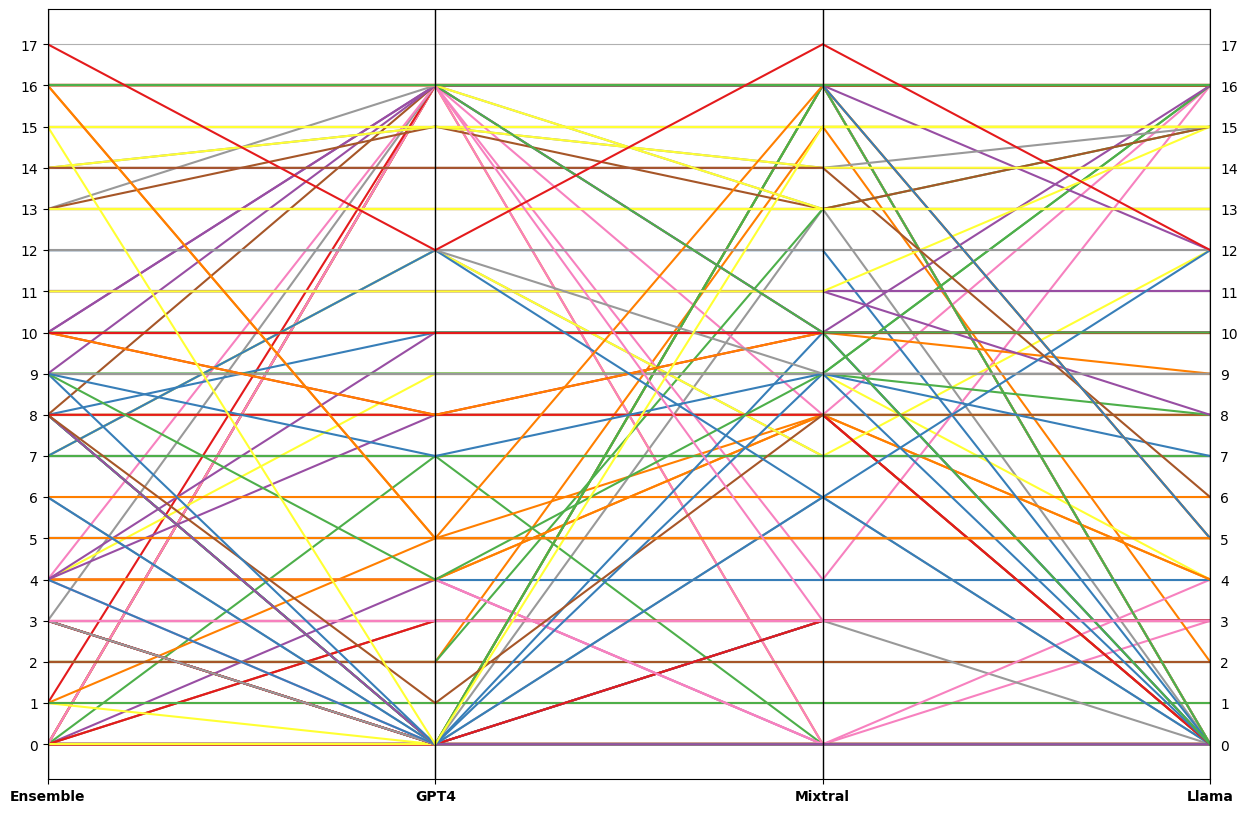

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import ast

df = pd.read_csv(r"all_data_predictions_test.csv")
df_1 = pd.read_csv(r"test_predictions_gpt-4.csv")
df_2 = pd.read_csv(r"mixtral_predictions_test.csv")
df_3 = pd.read_csv(r"llama-3_predictions_test.csv")

df['prediction'] = df['prediction'].apply(ast.literal_eval)
df['label'] = df['prediction'].apply(lambda x: int(x[0]['label'].replace("LABEL_", "")))
df_1['label'] = df_1['prediction'].apply(lambda x: int(x))

df_2['prediction'] = df_2['prediction'].apply(ast.literal_eval)
df_2['label'] = df_2['prediction'].apply(lambda x: int(x[0]['label'].replace("LABEL_", "")))

df_3['prediction'] = df_3['PREDICTION'].apply(ast.literal_eval)
df_3['label'] = df_3['prediction'].apply(lambda x: int(x[0]['label'].replace("LABEL_", "")))

df['Match'] = df['label'] == df_1['label']

df = df.sort_values(by='label', ascending=True)
df_1 = df_1.loc[df.index]  

data = {
    'Index': df.index,
    'Ensemble': df['label'],
    'GPT4': df_1['label'],
    'Mixtral': df_2['label'],
    'Llama': df_3['label']
}

df_parallel = pd.DataFrame(data)
df_parallel.sort_values('Ensemble', inplace=True)

plt.figure(figsize=(15, 10))
pc = parallel_coordinates(df_parallel, 'Index', colormap=plt.get_cmap("Set1"), sort_labels=True)

plt.yticks(range(min(df_parallel['Ensemble']), max(df_parallel['Ensemble']) + 1))

plt.gca().tick_params(labelright=True)
plt.yticks(range(min(df_parallel['Ensemble']), max(df_parallel['Ensemble']) + 1))

plt.xticks(fontweight="bold")
plt.gca().legend_.remove()
plt.show()
